In [ ]:
#importazione delle librerie necessarie
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#join dei cvs rilevanti
PROC_DIR = "data/processed"
adj_path = os.path.join(PROC_DIR, "adj_close_wide.csv")
vol_path = os.path.join(PROC_DIR, "volume_wide.csv")

adj = pd.read_csv(adj_path, index_col=0, parse_dates=True)
vol = pd.read_csv(vol_path, index_col=0, parse_dates=True).reindex(adj.index)

tickers = adj.columns.tolist()
adj = adj.sort_index().dropna(how="all")
print("Tickers:", tickers, "| Date range:", adj.index.min().date(), "→", adj.index.max().date())


Tickers: ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'NVDA'] | Date range: 2018-01-02 → 2025-08-12


In [2]:
#  Returns logaritmici (daily) 
returns = np.log(adj / adj.shift(1))

#  SMA50 / SMA200 (per ogni ticker)
sma50  = adj.rolling(window=50, min_periods=25).mean()
sma200 = adj.rolling(window=200, min_periods=100).mean()


In [3]:
# === Volatilità annualizzata e CAGR per ciascun ticker ===
metrics = []

def annualized_vol(series):
    return series.std(skipna=True) * np.sqrt(252)

def cagr(price_series):
    s = price_series.dropna()
    if len(s) < 2: 
        return np.nan
    years = (s.index[-1] - s.index[0]).days / 365.25
    return (s.iloc[-1] / s.iloc[0])**(1/years) - 1

def max_drawdown(price_series):
    s = price_series.dropna()
    roll_max = s.cummax()
    dd = s / roll_max - 1.0
    return dd.min()

for t in tickers:
    met = {
        "Ticker": t,
        "CAGR": cagr(adj[t]),
        "Vol_Ann": annualized_vol(returns[t]),
        "MaxDrawdown": max_drawdown(adj[t])
    }
    metrics.append(met)

metrics_df = pd.DataFrame(metrics).set_index("Ticker").sort_values("CAGR", ascending=False)
metrics_df.to_csv(os.path.join(PROC_DIR, "metrics_summary.csv"))
metrics_df


,CAGR,Vol_Ann,MaxDrawdown
Ticker,,,
NVDA,0.608263,0.519682,-0.663351
MSFT,0.283304,0.287792,-0.371485
AAPL,0.256657,0.312150,-0.385159
GOOG,0.194122,0.309576,-0.446018
AMZN,0.188690,0.346044,-0.561453


In [ ]:
# === Dataset features DAILY (long o wide) ===
# Wide: una tabella per tipo di feature
features_daily = {}
features_daily["AdjClose"] = adj
features_daily["Return"]   = returns
features_daily["SMA50"]    = sma50
features_daily["SMA200"]   = sma200

# Salva ciascuna vista 
for name, df in features_daily.items():
    df.to_csv(os.path.join(PROC_DIR, f"{name.lower()}_daily.csv"))

# Long: una tabella con le date e i ticker come colonne
long_frames = []
for name, df in features_daily.items():
    tmp = df.copy()
    tmp["Date"] = tmp.index
    long = tmp.melt(id_vars="Date", var_name="Ticker", value_name=name)
    long_frames.append(long)

# Merge incrementale sulle colonne comuni
from functools import reduce
features_long = reduce(lambda left, right: pd.merge(left, right, on=["Date","Ticker"], how="outer"), long_frames)
features_long = features_long.sort_values(["Ticker","Date"])
features_long.to_csv(os.path.join(PROC_DIR, "features_daily_long.csv"), index=False)


In [6]:
# === Rendimenti mensili (sommatoria dei log-returns nel mese) ===
returns_monthly = returns.resample("ME").sum()
returns_monthly.to_csv(os.path.join(PROC_DIR, "returns_monthly.csv"))
returns_monthly.tail()


,AAPL,AMZN,GOOG,MSFT,NVDA
Date,,,,,
2025-04-30,-0.044321,-0.031176,0.029392,0.051578,0.004970
2025-05-31,-0.055073,0.105843,0.071703,0.154299,0.215624
2025-06-30,0.021280,0.067792,0.027128,0.077406,0.156364
2025-07-31,0.011630,0.064940,0.083614,0.070044,0.118521
2025-08-31,0.102222,-0.055504,0.056939,-0.008017,0.029307


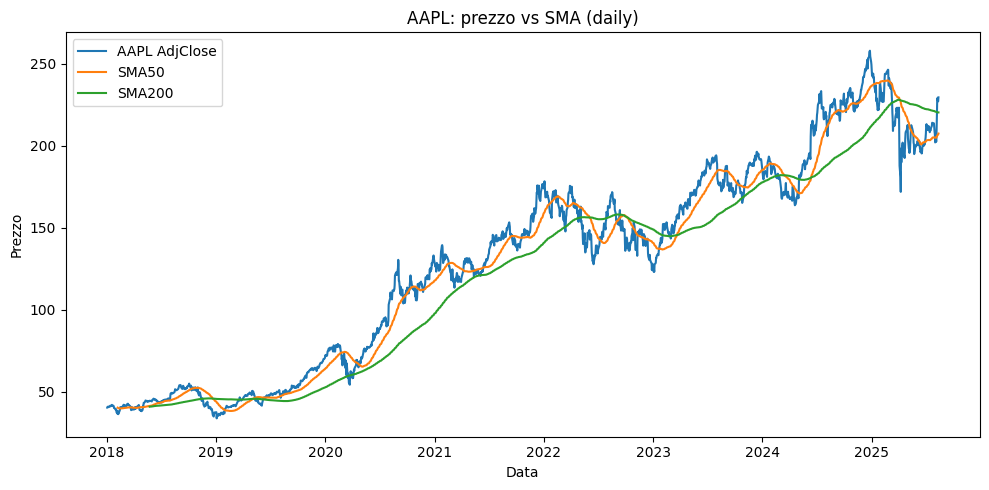

In [ ]:
# === Sanity plot: prezzo + SMA per un ticker ===
example = tickers[0]  
plt.figure(figsize=(10,5))
plt.plot(adj.index, adj[example], label=f"{example} AdjClose")
plt.plot(sma50.index, sma50[example], label="SMA50")
plt.plot(sma200.index, sma200[example], label="SMA200")
plt.title(f"{example}: prezzo vs SMA (daily)")
plt.xlabel("Data"); plt.ylabel("Prezzo")
plt.legend(); plt.tight_layout(); plt.show()


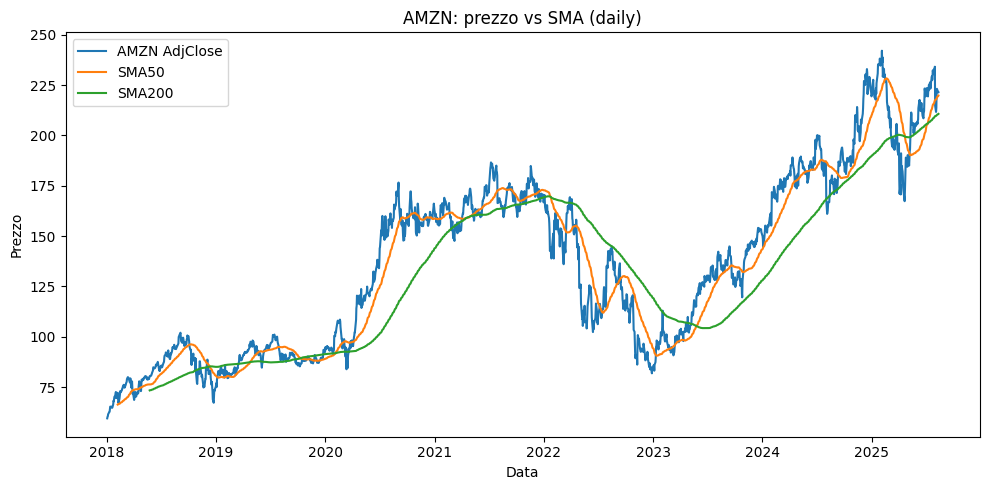

In [8]:
# === Sanity plot: prezzo + SMA per un ticker ===
example = tickers[1]  
plt.figure(figsize=(10,5))
plt.plot(adj.index, adj[example], label=f"{example} AdjClose")
plt.plot(sma50.index, sma50[example], label="SMA50")
plt.plot(sma200.index, sma200[example], label="SMA200")
plt.title(f"{example}: prezzo vs SMA (daily)")
plt.xlabel("Data"); plt.ylabel("Prezzo")
plt.legend(); plt.tight_layout(); plt.show()


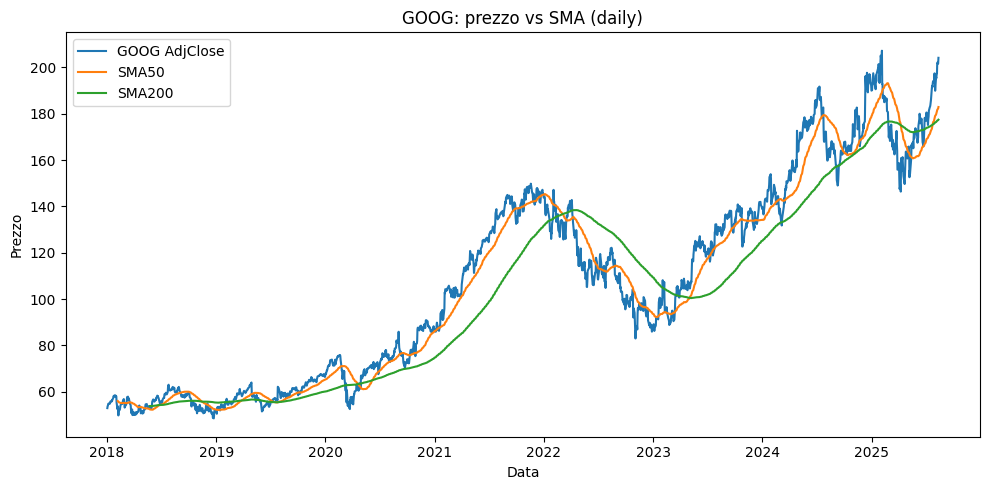

In [ ]:
# === Sanity plot: prezzo + SMA per un ticker ===
example = tickers[2]  
plt.figure(figsize=(10,5))
plt.plot(adj.index, adj[example], label=f"{example} AdjClose")
plt.plot(sma50.index, sma50[example], label="SMA50")
plt.plot(sma200.index, sma200[example], label="SMA200")
plt.title(f"{example}: prezzo vs SMA (daily)")
plt.xlabel("Data"); plt.ylabel("Prezzo")
plt.legend(); plt.tight_layout(); plt.show()


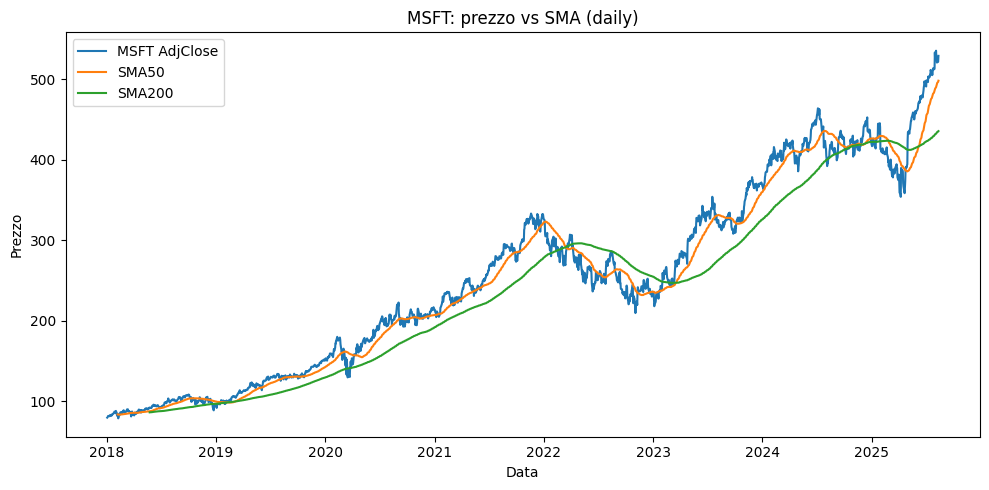

In [ ]:
# === Sanity plot: prezzo + SMA per un ticker ===
example = tickers[3]  
plt.figure(figsize=(10,5))
plt.plot(adj.index, adj[example], label=f"{example} AdjClose")
plt.plot(sma50.index, sma50[example], label="SMA50")
plt.plot(sma200.index, sma200[example], label="SMA200")
plt.title(f"{example}: prezzo vs SMA (daily)")
plt.xlabel("Data"); plt.ylabel("Prezzo")
plt.legend(); plt.tight_layout(); plt.show()


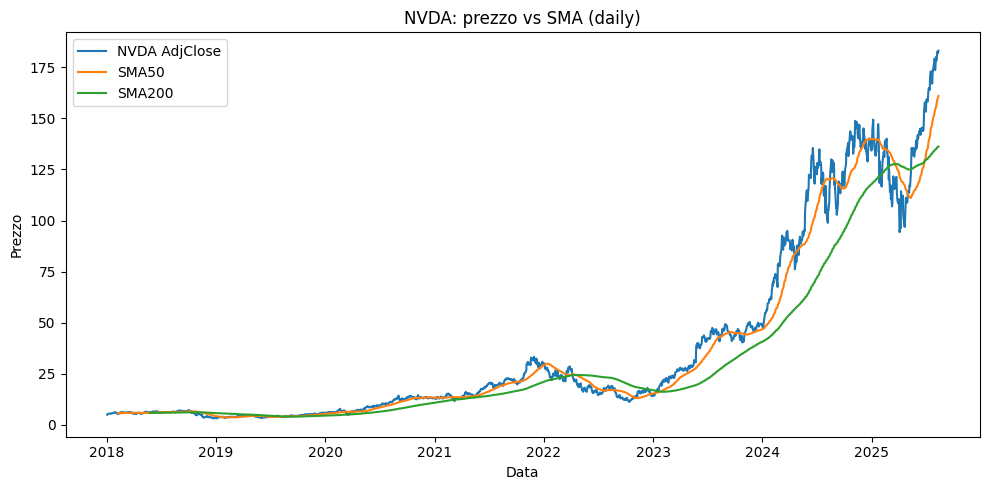

In [ ]:
# === Sanity plot: prezzo + SMA per un ticker ===
example = tickers[4]  
plt.figure(figsize=(10,5))
plt.plot(adj.index, adj[example], label=f"{example} AdjClose")
plt.plot(sma50.index, sma50[example], label="SMA50")
plt.plot(sma200.index, sma200[example], label="SMA200")
plt.title(f"{example}: prezzo vs SMA (daily)")
plt.xlabel("Data"); plt.ylabel("Prezzo")
plt.legend(); plt.tight_layout(); plt.show()
